In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

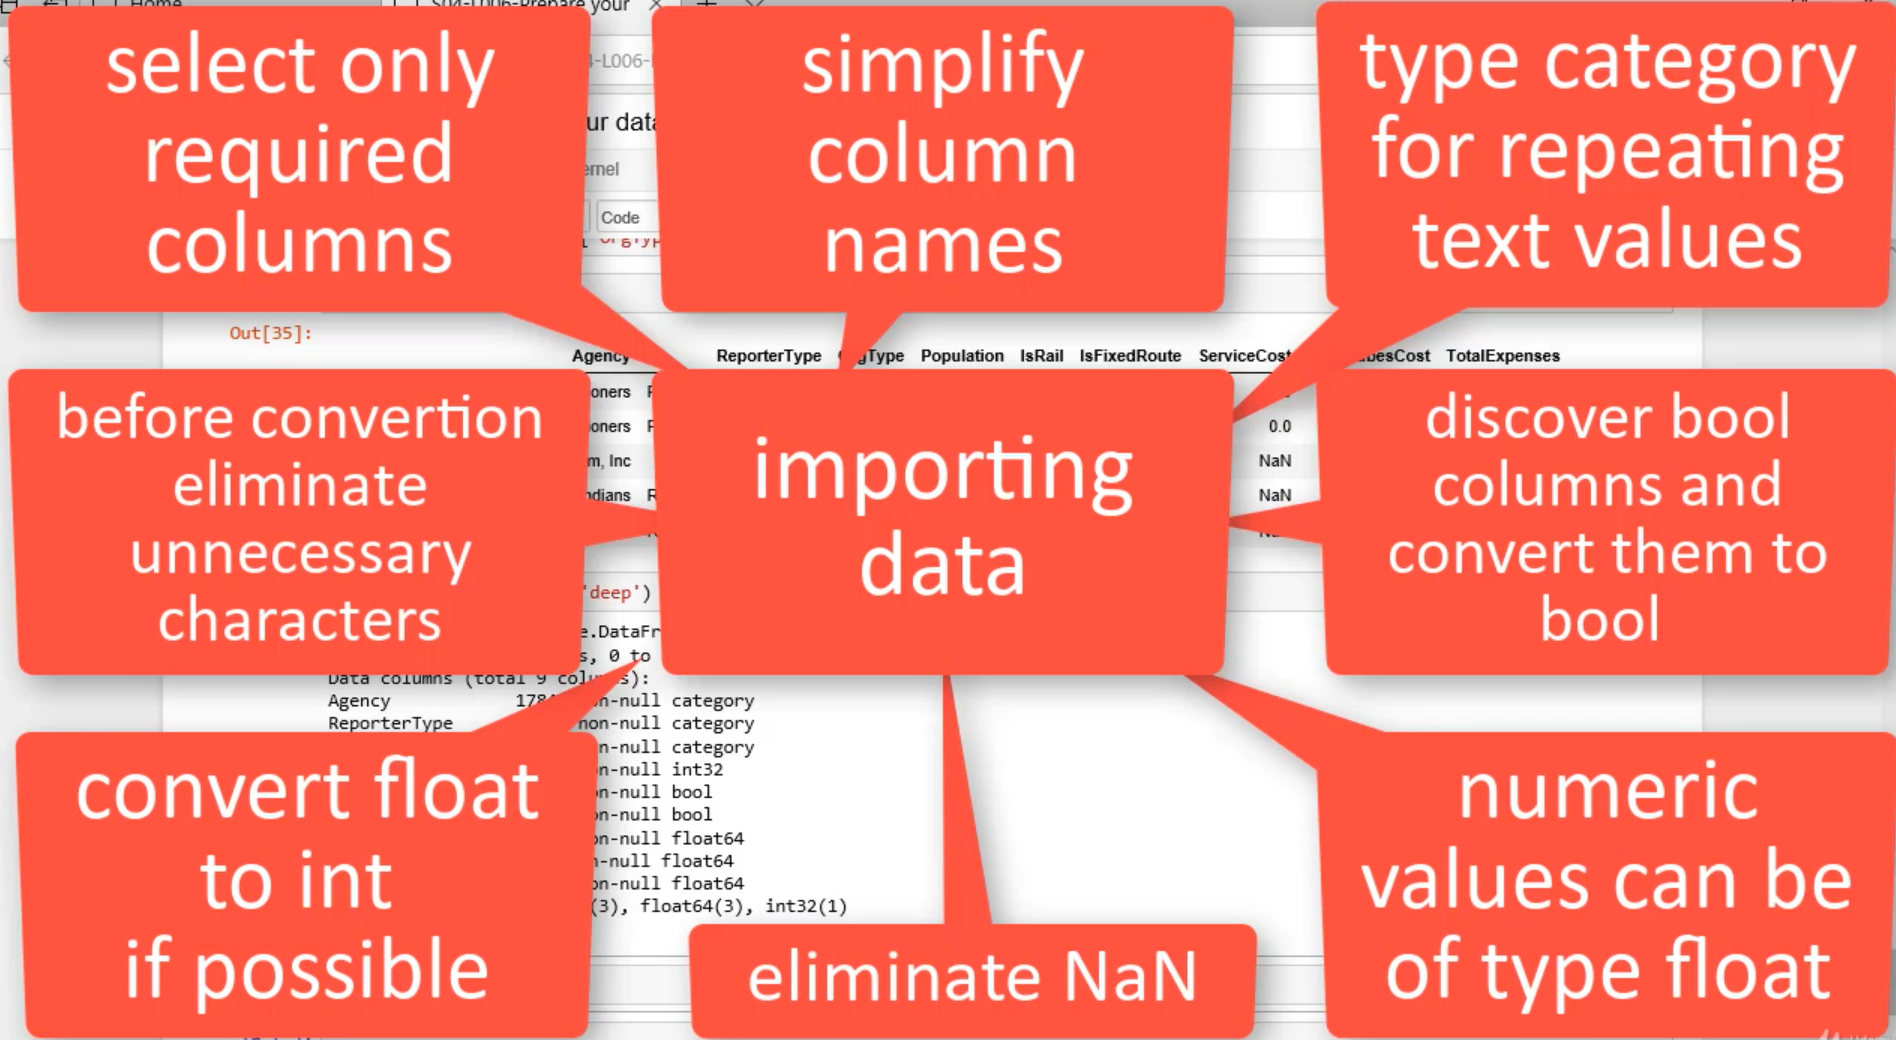

In [ ]:
frame = pd.read_csv('/content/PublicTransitExpenses.csv')
frame.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21,22,23,24,25,26,27,28,29,30,31,32,33,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,5 digit NTD ID,4 digit NTD ID,Agency,Reporter Type,Subrecipient Type,Organization Type,2015 Total Mode Vehicles (VOMS),Mode,Type of Service,Primary UZA Code,Primary UZA Name,Primary UZA Area SQ Miles,Primary UZA Population,Service Area SQ Miles,Service Area Population,Year,Vehicles Operated at Maximum Service (VOMS),Vehicles Available for Maximum Service (VAMS),Rail (Y/N),Fixed Route (Y/N),Expense Function,Operators' Salaries and Wages,Other Salaries and Wages,Fringe Benefits,Service Costs,Fuel and Lubricants,Tires and Tubes,Other Materials and Supplies,Utilities,Casualty and Liability Costs,Taxes,PT Funds In Report,PT Funds Reported Separately,Miscellaneous Expenses,Reduced Reporter Total OE,Total Operating Expenses,Total Operating Expenses (No Funds Reported Separately),ADA Related Expenses,Location 1
0,30098,3098,Washington County Commissioners,Reduced Reporter,NaN,NaN,NaN,DR,PT,NaN,NaN,NaN,NaN,NaN,NaN,2014,6.0,0.0,NaN,NaN,Total,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$122524.00,$122524.00,$122524.00,$0.00,NaN
1,30098,3098,Washington County Commissioners,Reduced Reporter,NaN,NaN,NaN,MB,PT,NaN,NaN,NaN,NaN,NaN,NaN,2014,6.0,0.0,NaN,NaN,Total,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$272715.00,$272715.00,$272715.00,$0.00,NaN
2,60107,6107,"Texoma Area Paratransit System, Inc",Full Reporter,NaN,NaN,NaN,CB,PT,NaN,NaN,NaN,NaN,NaN,NaN,2014,106.0,119.0,NaN,NaN,Non-Vehicle Maintenance,NaN,$2421.00,$369.00,NaN,NaN,NaN,$1107.00,NaN,NaN,NaN,$3398.00,NaN,NaN,NaN,$7295.00,$7295.00,NaN,NaN
3,9,0T09,Kalispel Tribe of Indians,Reduced Reporter,NaN,Tribe,4.0,DR,DO,0.0,Washington Non-UZA,NaN,NaN,NaN,NaN,2015,8.0,NaN,N,N,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$37416.00,$37416.00,$37416.00,NaN,"Usk, WA\n"
4,9,0T09,Kalispel Tribe of Indians,Reduced Reporter,NaN,Tribe,4.0,MB,DO,0.0,Washington Non-UZA,NaN,NaN,NaN,NaN,2015,8.0,NaN,N,Y,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$345789.00,$345789.00,$345789.00,NaN,"Usk, WA\n"


In [ ]:
frame = pd.read_csv('/content/PublicTransitExpenses.csv',low_memory=False)
frame.head()

,5 digit NTD ID,4 digit NTD ID,Agency,Reporter Type,Subrecipient Type,Organization Type,2015 Total Mode Vehicles (VOMS),Mode,Type of Service,Primary UZA Code,Primary UZA Name,Primary UZA Area SQ Miles,Primary UZA Population,Service Area SQ Miles,Service Area Population,Year,Vehicles Operated at Maximum Service (VOMS),Vehicles Available for Maximum Service (VAMS),Rail (Y/N),Fixed Route (Y/N),Expense Function,Operators' Salaries and Wages,Other Salaries and Wages,Fringe Benefits,Service Costs,Fuel and Lubricants,Tires and Tubes,Other Materials and Supplies,Utilities,Casualty and Liability Costs,Taxes,PT Funds In Report,PT Funds Reported Separately,Miscellaneous Expenses,Reduced Reporter Total OE,Total Operating Expenses,Total Operating Expenses (No Funds Reported Separately),ADA Related Expenses,Location 1
0,30098,3098,Washington County Commissioners,Reduced Reporter,NaN,NaN,NaN,DR,PT,NaN,NaN,NaN,NaN,NaN,NaN,2014,6.0,0.0,NaN,NaN,Total,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$122524.00,$122524.00,$122524.00,$0.00,NaN
1,30098,3098,Washington County Commissioners,Reduced Reporter,NaN,NaN,NaN,MB,PT,NaN,NaN,NaN,NaN,NaN,NaN,2014,6.0,0.0,NaN,NaN,Total,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$272715.00,$272715.00,$272715.00,$0.00,NaN
2,60107,6107,"Texoma Area Paratransit System, Inc",Full Reporter,NaN,NaN,NaN,CB,PT,NaN,NaN,NaN,NaN,NaN,NaN,2014,106.0,119.0,NaN,NaN,Non-Vehicle Maintenance,NaN,$2421.00,$369.00,NaN,NaN,NaN,$1107.00,NaN,NaN,NaN,$3398.00,NaN,NaN,NaN,$7295.00,$7295.00,NaN,NaN
3,9,0T09,Kalispel Tribe of Indians,Reduced Reporter,NaN,Tribe,4.0,DR,DO,0.0,Washington Non-UZA,NaN,NaN,NaN,NaN,2015,8.0,NaN,N,N,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$37416.00,$37416.00,$37416.00,NaN,"Usk, WA\n"
4,9,0T09,Kalispel Tribe of Indians,Reduced Reporter,NaN,Tribe,4.0,MB,DO,0.0,Washington Non-UZA,NaN,NaN,NaN,NaN,2015,8.0,NaN,N,Y,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$345789.00,$345789.00,$345789.00,NaN,"Usk, WA\n"


In [ ]:
frame.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17844 entries, 0 to 17843
Data columns (total 39 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   5 digit NTD ID                                           17844 non-null  object 
 1   4 digit NTD ID                                           17719 non-null  object 
 2   Agency                                                   17844 non-null  object 
 3   Reporter Type                                            17844 non-null  object 
 4   Subrecipient Type                                        3072 non-null   object 
 5   Organization Type                                        17759 non-null  object 
 6   2015 Total Mode Vehicles (VOMS)                          17522 non-null  float64
 7   Mode                                                     17844 non-null  object 
 8   Type of Service           

In [ ]:
frame = pd.read_csv('/content/PublicTransitExpenses.csv',
                    usecols=['Agency', 'Reporter Type', 'Organization Type',
                             'Rail (Y/N)', 'Fixed Route (Y/N)',
                             'Service Costs', 'Tires and Tubes', 'Total Operating Expenses',
                             'Service Area Population'], low_memory=False)

frame.head()

,Agency,Reporter Type,Organization Type,Service Area Population,Rail (Y/N),Fixed Route (Y/N),Service Costs,Tires and Tubes,Total Operating Expenses
0,Washington County Commissioners,Reduced Reporter,NaN,NaN,NaN,NaN,$0.00,$0.00,$122524.00
1,Washington County Commissioners,Reduced Reporter,NaN,NaN,NaN,NaN,$0.00,$0.00,$272715.00
2,"Texoma Area Paratransit System, Inc",Full Reporter,NaN,NaN,NaN,NaN,NaN,NaN,$7295.00
3,Kalispel Tribe of Indians,Reduced Reporter,Tribe,NaN,N,N,NaN,NaN,$37416.00
4,Kalispel Tribe of Indians,Reduced Reporter,Tribe,NaN,N,Y,NaN,NaN,$345789.00


In [ ]:
frame.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17844 entries, 0 to 17843
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Agency                    17844 non-null  object 
 1   Reporter Type             17844 non-null  object 
 2   Organization Type         17759 non-null  object 
 3   Service Area Population   14418 non-null  float64
 4   Rail (Y/N)                17318 non-null  object 
 5   Fixed Route (Y/N)         17318 non-null  object 
 6   Service Costs             10262 non-null  object 
 7   Tires and Tubes           5615 non-null   object 
 8   Total Operating Expenses  17844 non-null  object 
dtypes: float64(1), object(8)
memory usage: 9.5 MB


In [ ]:
newColumnNames = {'Agency'  :   'Agency', 
                  'Reporter Type'   :   'ReporterType', 
                  'Organization Type'   :   'OrgType',
                  'Service Area Population'   :   'Population',
                  'Rail (Y/N)'    :   'IsRail', 
                  'Fixed Route (Y/N)'   :   'IsFixedRoute',
                  'Service Costs'   :   'ServiceCost', 
                  'Tires and Tubes'   :   'TiresTubesCost', 
                  'Total Operating Expenses'    :   'TotalExpenses'
                  }

In [ ]:
frame.rename(columns=newColumnNames, inplace=True)
frame.head()

,Agency,ReporterType,OrgType,Population,IsRail,IsFixedRoute,ServiceCost,TiresTubesCost,TotalExpenses
0,Washington County Commissioners,Reduced Reporter,NaN,NaN,NaN,NaN,$0.00,$0.00,$122524.00
1,Washington County Commissioners,Reduced Reporter,NaN,NaN,NaN,NaN,$0.00,$0.00,$272715.00
2,"Texoma Area Paratransit System, Inc",Full Reporter,NaN,NaN,NaN,NaN,NaN,NaN,$7295.00
3,Kalispel Tribe of Indians,Reduced Reporter,Tribe,NaN,N,N,NaN,NaN,$37416.00
4,Kalispel Tribe of Indians,Reduced Reporter,Tribe,NaN,N,Y,NaN,NaN,$345789.00


In [13]:
frame['ReporterType'].nunique()

4

In [14]:
frame['ReporterType'].count()

17844

In [15]:
frame['ReporterType'].value_counts()

Full Reporter       13345
Rural Reporter       3116
Reduced Reporter     1313
Separate Service       70
Name: ReporterType, dtype: int64

In [16]:
frame['ReporterType'] = frame['ReporterType'].astype('category')

In [17]:
frame.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17844 entries, 0 to 17843
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Agency          17844 non-null  object  
 1   ReporterType    17844 non-null  category
 2   OrgType         17759 non-null  object  
 3   Population      14418 non-null  float64 
 4   IsRail          17318 non-null  object  
 5   IsFixedRoute    17318 non-null  object  
 6   ServiceCost     10262 non-null  object  
 7   TiresTubesCost  5615 non-null   object  
 8   TotalExpenses   17844 non-null  object  
dtypes: category(1), float64(1), object(7)
memory usage: 8.3 MB


In [18]:
frame['Agency'] = frame['Agency'].astype('category')
frame['OrgType'] = frame['OrgType'].astype('category')

In [19]:
frame.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17844 entries, 0 to 17843
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Agency          17844 non-null  category
 1   ReporterType    17844 non-null  category
 2   OrgType         17759 non-null  category
 3   Population      14418 non-null  float64 
 4   IsRail          17318 non-null  object  
 5   IsFixedRoute    17318 non-null  object  
 6   ServiceCost     10262 non-null  object  
 7   TiresTubesCost  5615 non-null   object  
 8   TotalExpenses   17844 non-null  object  
dtypes: category(3), float64(1), object(5)
memory usage: 5.2 MB


Kolumna 'Population' jest typu float64, bo znajdują się w niej wartości NaN. Aby przekonwertować do typu int najpierw umieszczam w miejsce NaN 0, a następnie konwertuje do int

In [20]:
frame['Population'].fillna(0, inplace=True)

In [21]:
frame['Population'] = frame['Population'].astype('int')

In [22]:
frame.head()

,Agency,ReporterType,OrgType,Population,IsRail,IsFixedRoute,ServiceCost,TiresTubesCost,TotalExpenses
0,Washington County Commissioners,Reduced Reporter,NaN,0,NaN,NaN,$0.00,$0.00,$122524.00
1,Washington County Commissioners,Reduced Reporter,NaN,0,NaN,NaN,$0.00,$0.00,$272715.00
2,"Texoma Area Paratransit System, Inc",Full Reporter,NaN,0,NaN,NaN,NaN,NaN,$7295.00
3,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,N,N,NaN,NaN,$37416.00
4,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,N,Y,NaN,NaN,$345789.00


In [23]:
frame[frame['Population']>0].head()

,Agency,ReporterType,OrgType,Population,IsRail,IsFixedRoute,ServiceCost,TiresTubesCost,TotalExpenses
71,Reno-Sparks Indian Colony,Reduced Reporter,Tribe,1127,N,Y,NaN,NaN,$174810.00
92,City of Pocatello,Reduced Reporter,"City, County or Local Government Unit or Depar...",81730,N,Y,NaN,NaN,$1119899.00
93,Lee-Russell Council of Governments,Reduced Reporter,"MPO, COG or Other Planning Agency",193194,N,N,NaN,NaN,$1540633.00
94,"Aiken Area Council on Aging, Inc.",Reduced Reporter,Area Agency on Aging,160099,N,Y,NaN,NaN,$525325.00
101,City of Lawrence,Full Reporter,Consolidated Reporter,87643,N,Y,NaN,NaN,$937407.00


In [24]:
frame.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17844 entries, 0 to 17843
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Agency          17844 non-null  category
 1   ReporterType    17844 non-null  category
 2   OrgType         17759 non-null  category
 3   Population      17844 non-null  int64   
 4   IsRail          17318 non-null  object  
 5   IsFixedRoute    17318 non-null  object  
 6   ServiceCost     10262 non-null  object  
 7   TiresTubesCost  5615 non-null   object  
 8   TotalExpenses   17844 non-null  object  
dtypes: category(3), int64(1), object(5)
memory usage: 5.2 MB


Konwertuje wartość 'Y' na True itd.

In [26]:
frame['IsRail'].replace(('Y','N'),(True,False),inplace=True)
frame['IsFixedRoute'].replace(('Y','N'),(True,False),inplace=True)
frame.head()

,Agency,ReporterType,OrgType,Population,IsRail,IsFixedRoute,ServiceCost,TiresTubesCost,TotalExpenses
0,Washington County Commissioners,Reduced Reporter,NaN,0,NaN,NaN,$0.00,$0.00,$122524.00
1,Washington County Commissioners,Reduced Reporter,NaN,0,NaN,NaN,$0.00,$0.00,$272715.00
2,"Texoma Area Paratransit System, Inc",Full Reporter,NaN,0,NaN,NaN,NaN,NaN,$7295.00
3,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,False,False,NaN,NaN,$37416.00
4,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,False,True,NaN,NaN,$345789.00


In [27]:
frame.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17844 entries, 0 to 17843
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Agency          17844 non-null  category
 1   ReporterType    17844 non-null  category
 2   OrgType         17759 non-null  category
 3   Population      17844 non-null  int64   
 4   IsRail          17318 non-null  object  
 5   IsFixedRoute    17318 non-null  object  
 6   ServiceCost     10262 non-null  object  
 7   TiresTubesCost  5615 non-null   object  
 8   TotalExpenses   17844 non-null  object  
dtypes: category(3), int64(1), object(5)
memory usage: 4.3 MB


Jeżeli wartość jest NaN to podmień na False

In [28]:
frame['IsRail'].fillna(False,inplace=True)
frame['IsFixedRoute'].fillna(False,inplace=True)

Konwertuje na typ logiczny

In [29]:
frame['IsRail']=frame['IsRail'].astype('bool')
frame['IsFixedRoute']=frame['IsFixedRoute'].astype('bool')
frame.head()

,Agency,ReporterType,OrgType,Population,IsRail,IsFixedRoute,ServiceCost,TiresTubesCost,TotalExpenses
0,Washington County Commissioners,Reduced Reporter,NaN,0,False,False,$0.00,$0.00,$122524.00
1,Washington County Commissioners,Reduced Reporter,NaN,0,False,False,$0.00,$0.00,$272715.00
2,"Texoma Area Paratransit System, Inc",Full Reporter,NaN,0,False,False,NaN,NaN,$7295.00
3,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,False,False,NaN,NaN,$37416.00
4,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,False,True,NaN,NaN,$345789.00


In [31]:
frame.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17844 entries, 0 to 17843
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Agency          17844 non-null  category
 1   ReporterType    17844 non-null  category
 2   OrgType         17759 non-null  category
 3   Population      17844 non-null  int64   
 4   IsRail          17844 non-null  bool    
 5   IsFixedRoute    17844 non-null  bool    
 6   ServiceCost     10262 non-null  object  
 7   TiresTubesCost  5615 non-null   object  
 8   TotalExpenses   17844 non-null  object  
dtypes: bool(2), category(3), int64(1), object(3)
memory usage: 3.2 MB


Usuwam znak dolara

In [32]:
frame['ServiceCost']=frame['ServiceCost'].str.replace('$','')
frame['TiresTubesCost']=frame['TiresTubesCost'].str.replace('$','')
frame['TotalExpenses']=frame['TotalExpenses'].str.replace('$','')
frame.head()

,Agency,ReporterType,OrgType,Population,IsRail,IsFixedRoute,ServiceCost,TiresTubesCost,TotalExpenses
0,Washington County Commissioners,Reduced Reporter,NaN,0,False,False,0.00,0.00,122524.00
1,Washington County Commissioners,Reduced Reporter,NaN,0,False,False,0.00,0.00,272715.00
2,"Texoma Area Paratransit System, Inc",Full Reporter,NaN,0,False,False,NaN,NaN,7295.00
3,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,False,False,NaN,NaN,37416.00
4,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,False,True,NaN,NaN,345789.00


In [33]:
frame['ServiceCost']=frame['ServiceCost'].astype('float')
frame['TiresTubesCost']=frame['TiresTubesCost'].astype('float')
frame['TotalExpenses']=frame['TotalExpenses'].astype('float')
frame.head()

,Agency,ReporterType,OrgType,Population,IsRail,IsFixedRoute,ServiceCost,TiresTubesCost,TotalExpenses
0,Washington County Commissioners,Reduced Reporter,NaN,0,False,False,0.0,0.0,122524.0
1,Washington County Commissioners,Reduced Reporter,NaN,0,False,False,0.0,0.0,272715.0
2,"Texoma Area Paratransit System, Inc",Full Reporter,NaN,0,False,False,NaN,NaN,7295.0
3,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,False,False,NaN,NaN,37416.0
4,Kalispel Tribe of Indians,Reduced Reporter,Tribe,0,False,True,NaN,NaN,345789.0


In [34]:
frame.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17844 entries, 0 to 17843
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Agency          17844 non-null  category
 1   ReporterType    17844 non-null  category
 2   OrgType         17759 non-null  category
 3   Population      17844 non-null  int64   
 4   IsRail          17844 non-null  bool    
 5   IsFixedRoute    17844 non-null  bool    
 6   ServiceCost     10262 non-null  float64 
 7   TiresTubesCost  5615 non-null   float64 
 8   TotalExpenses   17844 non-null  float64 
dtypes: bool(2), category(3), float64(3), int64(1)
memory usage: 931.7 KB


In [35]:
frame['Agency'] = frame['Agency'].str.title().astype('category')
frame['ReporterType'] = frame['ReporterType'].str.upper().astype('category')
frame['OrgType'] = frame['OrgType'].str.upper().astype('category')
frame.head()

,Agency,ReporterType,OrgType,Population,IsRail,IsFixedRoute,ServiceCost,TiresTubesCost,TotalExpenses
0,Washington County Commissioners,REDUCED REPORTER,NaN,0,False,False,0.0,0.0,122524.0
1,Washington County Commissioners,REDUCED REPORTER,NaN,0,False,False,0.0,0.0,272715.0
2,"Texoma Area Paratransit System, Inc",FULL REPORTER,NaN,0,False,False,NaN,NaN,7295.0
3,Kalispel Tribe Of Indians,REDUCED REPORTER,TRIBE,0,False,False,NaN,NaN,37416.0
4,Kalispel Tribe Of Indians,REDUCED REPORTER,TRIBE,0,False,True,NaN,NaN,345789.0


In [36]:
frame.head()

,Agency,ReporterType,OrgType,Population,IsRail,IsFixedRoute,ServiceCost,TiresTubesCost,TotalExpenses
0,Washington County Commissioners,REDUCED REPORTER,NaN,0,False,False,0.0,0.0,122524.0
1,Washington County Commissioners,REDUCED REPORTER,NaN,0,False,False,0.0,0.0,272715.0
2,"Texoma Area Paratransit System, Inc",FULL REPORTER,NaN,0,False,False,NaN,NaN,7295.0
3,Kalispel Tribe Of Indians,REDUCED REPORTER,TRIBE,0,False,False,NaN,NaN,37416.0
4,Kalispel Tribe Of Indians,REDUCED REPORTER,TRIBE,0,False,True,NaN,NaN,345789.0
